In [37]:
from jamdict import Jamdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
jmd = Jamdict()

# has kanji: str, read
df_jouyou = pd.read_csv('../data/onyomi_statistics.csv', sep='\t',names=['kanji','read'])

In [ ]:
str_jouyou = "".join(df_jouyou["kanji"].to_list())

res_test = jmd.lookup(str_jouyou)

In [133]:
jmd.lookup("一").chars.literal

AttributeError: 'list' object has no attribute 'literal'

In [ ]:
stroke_counts = np.zeros((len(str_jouyou)))
for i,r in enumerate(res_test.chars):
    stroke_counts[i] = r.stroke_count

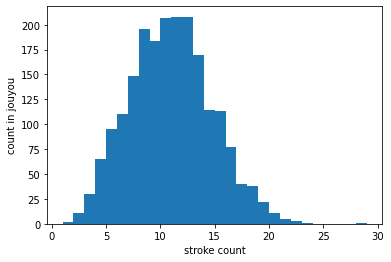

In [61]:
plt.hist(stroke_counts, bins=28)
plt.xlabel("stroke count")
plt.ylabel("count in jouyou")
plt.show()

915
730
181
103
2059


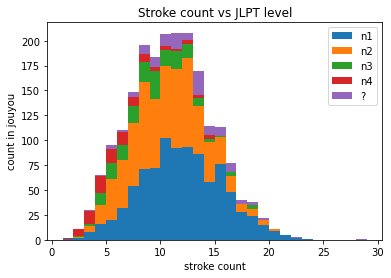

In [111]:
n1 = list(filter(lambda x:x.jlpt=="1",res_test.chars))
n1 = list(map(lambda x: x.stroke_count, n1))
print(len(n1))
n2 = list(filter(lambda x:x.jlpt=="2",res_test.chars))
n2 = list(map(lambda x: x.stroke_count, n2))
print(len(n2))
n3 = list(filter(lambda x:x.jlpt=="3",res_test.chars))
n3 = list(map(lambda x: x.stroke_count, n3))
print(len(n3))
n4 = list(filter(lambda x:x.jlpt=="4",res_test.chars))
n4 = list(map(lambda x: x.stroke_count, n4))
print(len(n4))
print(len(df_jouyou))
nx = list(filter(lambda x:x.jlpt!="4" and x.jlpt!="3" and x.jlpt!="2" and x.jlpt!="1",res_test.chars))
nx = list(map(lambda x: x.stroke_count, nx))

#cs = ["r","b","g","y","k"]
ls = [n1,n2,n3,n4,nx]
    
plt.hist(ls, bins=28, stacked=True)
plt.xlabel("stroke count")
plt.ylabel("count in jouyou")
plt.legend(["n1", "n2", "n3", "n4", "?"])
plt.title("Stroke count vs JLPT level")
plt.show()

It is clearly seen that higher JLPT levels have kanji with higher stroke counts

In [127]:
for l in ls:
    print(sum(l)/len(l), max(l))
print("n1->n2->n3->n4->other")

11.486338797814208 23
9.971232876712328 20
8.823204419889503 18
6.194174757281553 14
11.976923076923077 29
n1->n2->n3->n4->other


Numerically this holds too